In [ ]:

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

## Import libraries and load dataset

In [ ]:
usedcars_data = pd.read_csv("cars.csv")
usedcars_data.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [ ]:
usedcars_data.isna().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

In [ ]:
usedcars_data.isnull().sum()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

## Exploratory Data Analysis:

### Univariate Analysis to understand the distribution of features

In [ ]:
#Bar Charts
#Pie Charts
#Histograms


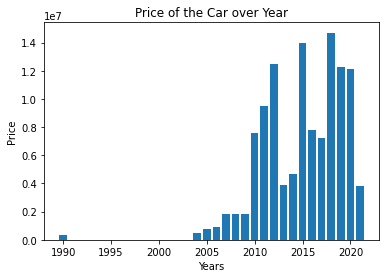

In [ ]:
#Bar Chart
fig = plt.figure()
x_axis = list(usedcars_data['year'])
y_axis = list(usedcars_data['price'])

plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Price of the Car over Year")

plt.bar(x_axis,y_axis)

plt.show()
plt.show()

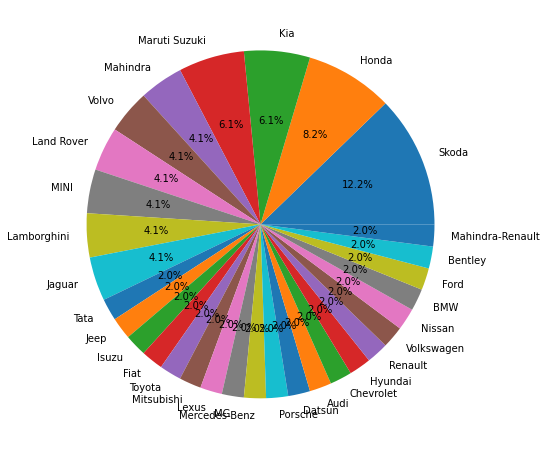

In [ ]:
#Pie Chart

df = usedcars_data

#drop the column which are not require.
# df = df.drop(['Id','year','full_model_name','model_name','distance_travelled(kms)','city','brand_rank','car_age'], axis=1)

#based on make count the number of models

df['count'] = df.groupby(['brand','price'])['brand'].transform('count')

df.drop_duplicates('brand',inplace=True)

df.sort_values(by='count',ascending=False,inplace=True)

#Based on the count obtain we will plot our graph.

plt.figure(figsize=(50,8))

plt.pie(df['count'],labels=df['brand'],autopct='%1.1f%%')

plt.show()

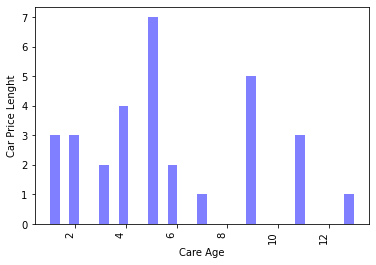

In [ ]:
x_mosco = usedcars_data["price"]
x_san_Francisco = usedcars_data["car_age"]

plt.hist(x_san_Francisco, len(x_mosco), facecolor='blue', alpha=0.5)

plt.xlabel("Care Age")
plt.ylabel("Car Price Lenght")

plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right') # Rotate Axis Labels

plt.show()

### Multivariate analysis to determine correlations

● Layout regression experiment space.

● Publish the performance of all the models on the same hold-out/ test dataset.

● List out the most important features determining the price of used cars.

### LogisticRegression


                Id         year         price  distance_travelled(kms)  \
count    31.000000    31.000000  3.100000e+01                31.000000   
mean    192.000000  2015.322581  2.314194e+06             44825.838710   
std     343.104843     3.320513  2.775132e+06             37471.426742   
min       0.000000  2008.000000  1.150000e+05              2814.000000   
25%      20.500000  2012.000000  4.775000e+05             14673.000000   
50%      66.000000  2016.000000  1.450000e+06             39500.000000   
75%     156.000000  2017.500000  2.950000e+06             68296.500000   
max    1722.000000  2020.000000  1.250000e+07            142522.000000   

       brand_rank    car_age      count  
count   31.000000  31.000000  31.000000  
mean    24.064516   5.677419   1.580645  
std     18.624241   3.320513   1.118755  
min      1.000000   1.000000   1.000000  
25%      9.500000   3.500000   1.000000  
50%     19.000000   5.000000   1.000000  
75%     39.500000   9.000000   2.000000

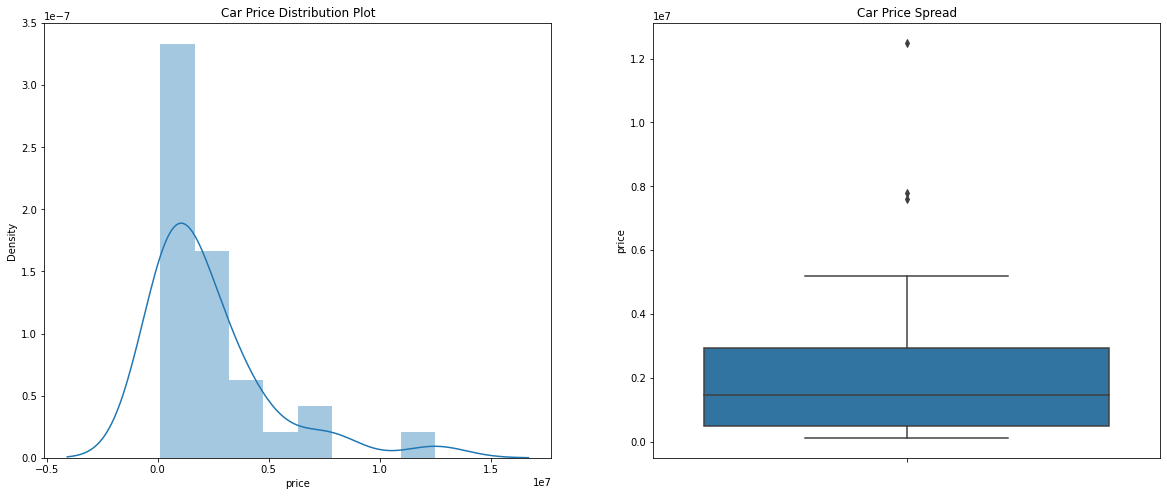

In [ ]:
# Liner Regression
lr_df = usedcars_data.copy()
print(lr_df.describe())


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(lr_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=lr_df.price)

plt.show()


In [ ]:
print(lr_df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count    3.100000e+01
mean     2.314194e+06
std      2.775132e+06
min      1.150000e+05
25%      4.775000e+05
50%      1.450000e+06
75%      2.950000e+06
85%      4.022500e+06
90%      5.200000e+06
100%     1.250000e+07
max      1.250000e+07
Name: price, dtype: float64


In [ ]:
lr_df.loc[lr_df.duplicated()]


,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,count


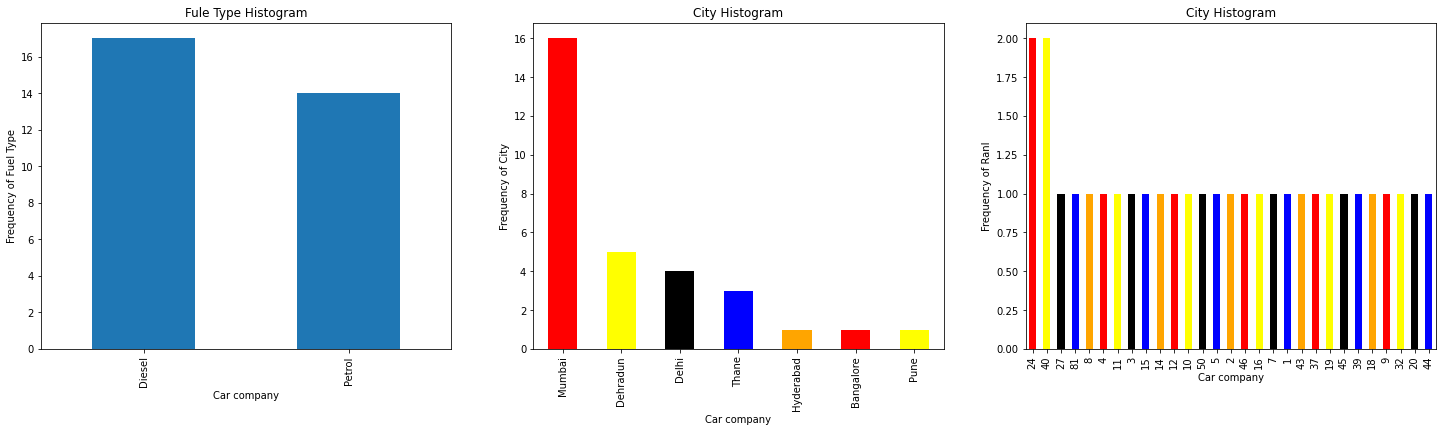

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 6))
c = ['red', 'yellow', 'black', 'blue', 'orange']

plt.subplot(1,3,1)
plt1 = lr_df.fuel_type.value_counts().plot(kind='bar') 
plt.title('Fule Type Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of Fuel Type')

plt.subplot(1,3,2)
plt1 = lr_df.city.value_counts().plot(kind='bar',color = c) 
plt.title('City Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of City')


plt.subplot(1,3,3)
plt1 = lr_df.brand_rank.value_counts(sort=True).plot(kind='bar',color = c) 
plt.title('City Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of Ranl')

plt.show()


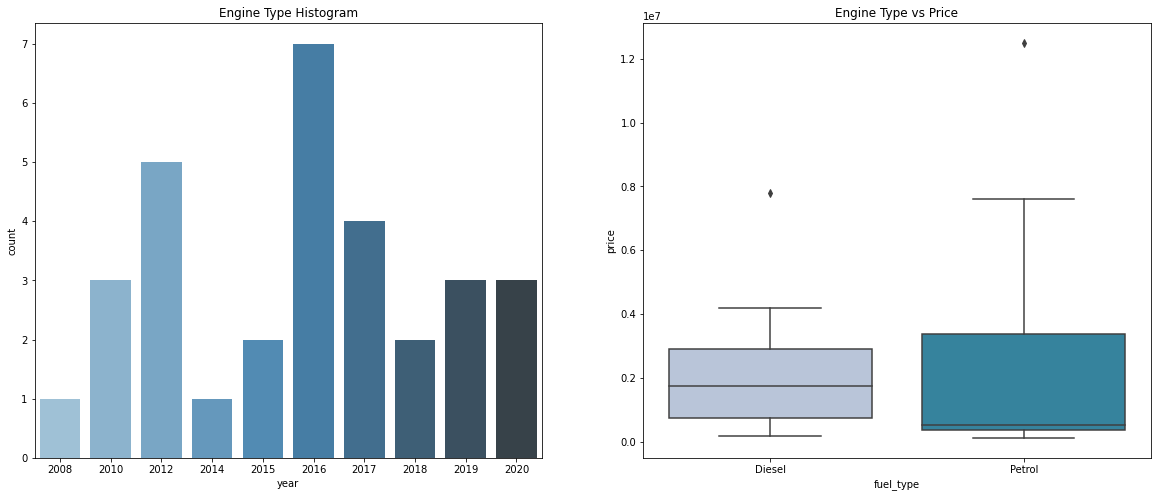

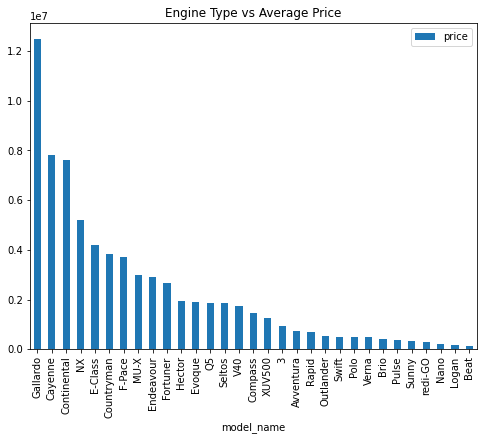

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(lr_df.year, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=lr_df.fuel_type, y=lr_df.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(lr_df.groupby(['model_name'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

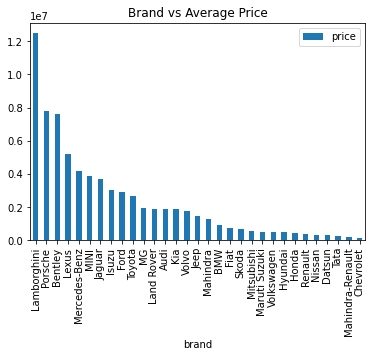

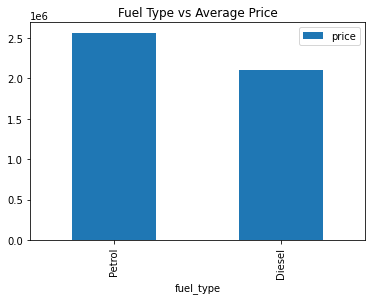

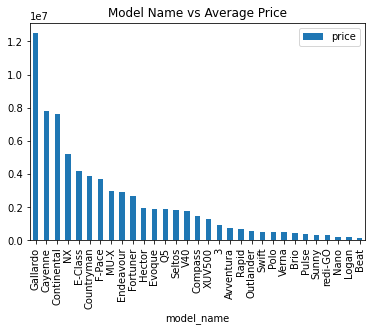

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(lr_df.groupby(['brand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand vs Average Price')
plt.show()

df = pd.DataFrame(lr_df.groupby(['fuel_type'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(lr_df.groupby(['model_name'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Model Name vs Average Price')
plt.show()

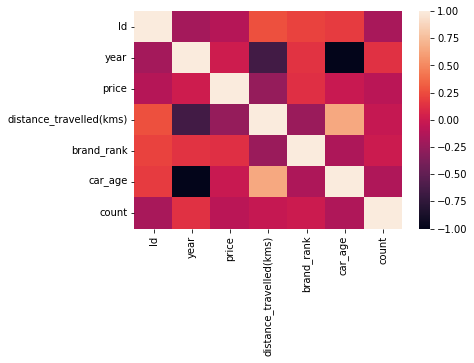

In [ ]:
corr = lr_df.corr()

sns.heatmap(corr)
plt.show()

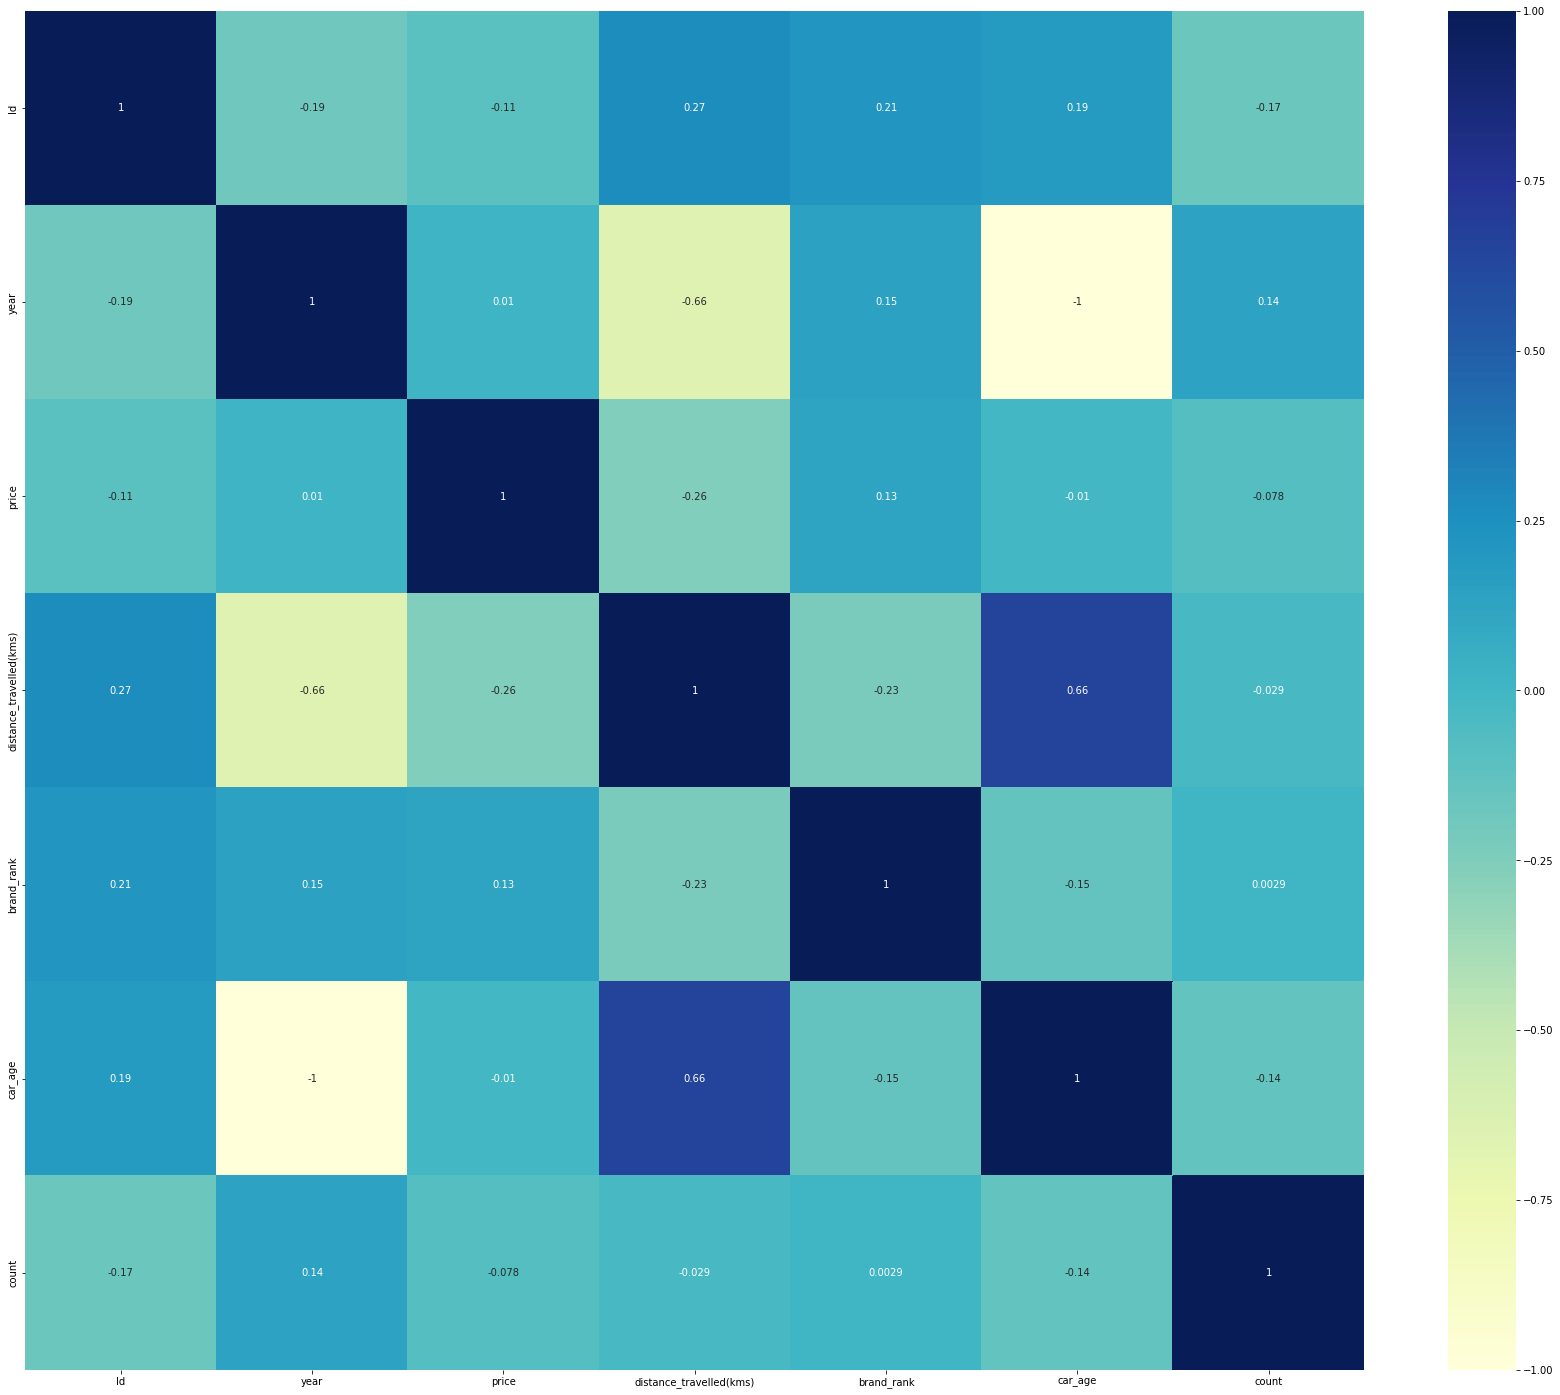

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(lr_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 23 to 1722
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       31 non-null     int64  
 1   year                     31 non-null     int64  
 2   brand                    31 non-null     object 
 3   full_model_name          31 non-null     object 
 4   model_name               31 non-null     object 
 5   price                    31 non-null     float64
 6   distance_travelled(kms)  31 non-null     float64
 7   fuel_type                31 non-null     object 
 8   city                     31 non-null     object 
 9   brand_rank               31 non-null     int64  
 10  car_age                  31 non-null     float64
 11  count                    31 non-null     int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.2+ KB


In [ ]:
#Dividing data into X and y variables
print(lr_df.columns)
print(lr_df.head())
import statsmodels.api as sm

X = sm.add_constant(lr_df['brand_rank'])
Y = lr_df['price']

Index(['Id', 'year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank', 'car_age',
       'count'],
      dtype='object')
      Id  year          brand                         full_model_name  \
23    23  2016          Skoda            Skoda Rapid Style 1.5 TDI AT   
0      0  2016          Honda                         Honda Brio S MT   
455  455  2020            Kia  Kia Seltos GTX Plus AT 1.4 [2019-2020]   
9      9  2015  Maruti Suzuki           Maruti Suzuki Swift Dzire ZXI   
63    63  2016       Mahindra                  Mahindra XUV500 W10 AT   

    model_name      price  distance_travelled(kms) fuel_type    city  \
23       Rapid   675000.0                  58000.0    Diesel  Mumbai   
0         Brio   425000.0                   9680.0    Petrol  Mumbai   
455     Seltos  1850000.0                   5800.0    Petrol   Delhi   
9        Swift   510000.0                  48286.0    Petrol  Mumbai   
63      XU

In [453]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 10, test_size = 0.20) 
ln_model = LogisticRegression(solver='lbfgs', max_iter=3000)
ln_model.fit(train_x, train_y)

predicted_data = ln_model.predict(train_x)
print("\nAccuracy Score for LogisticRegression:")
metrics.accuracy_score(train_y, predicted_data)

ln_model.coef_
ln_model.intercept_
ln_model.score(X,Y)
y_pred = ln_model.predict(X)
print("r2_score:")
r2_score(Y,y_pred)
print("Mean Squared Error:")
print(mean_squared_error(Y,y_pred))
print(print("Root Mean Squared Error:"))
mean_squared_error(Y,y_pred,squared=False)
print("Mean Absolute Error:")
print(mean_absolute_error(Y,y_pred))





Accuracy Score for LogisticRegression:
r2_score:


ValueError: ignored

### DecisionTreeClassifier

In [ ]:
dt_df = usedcars_data.copy()
dt_df.isna()

Y = dt_df["price"]
X = dt_df.drop(["price"], axis=1)

X = pd.get_dummies(X)
X.head()

X = X.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='gini', random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
dec_tree.fit(X, Y)
predicted_outcome = dec_tree.predict(X)
print("\nAccuracy Score for DecisionTreeClassifier:")
metrics.accuracy_score(predicted_outcome, Y)




Accuracy Score for DecisionTreeClassifier:


1.0

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)

print("Accuracy score on training data is ",accuracy_score(y_pred_train,y_train))
print("Accuracy score on test data is ",accuracy_score(y_pred_test,y_test))

Accuracy score on training data is  1.0
Accuracy score on test data is  1.0


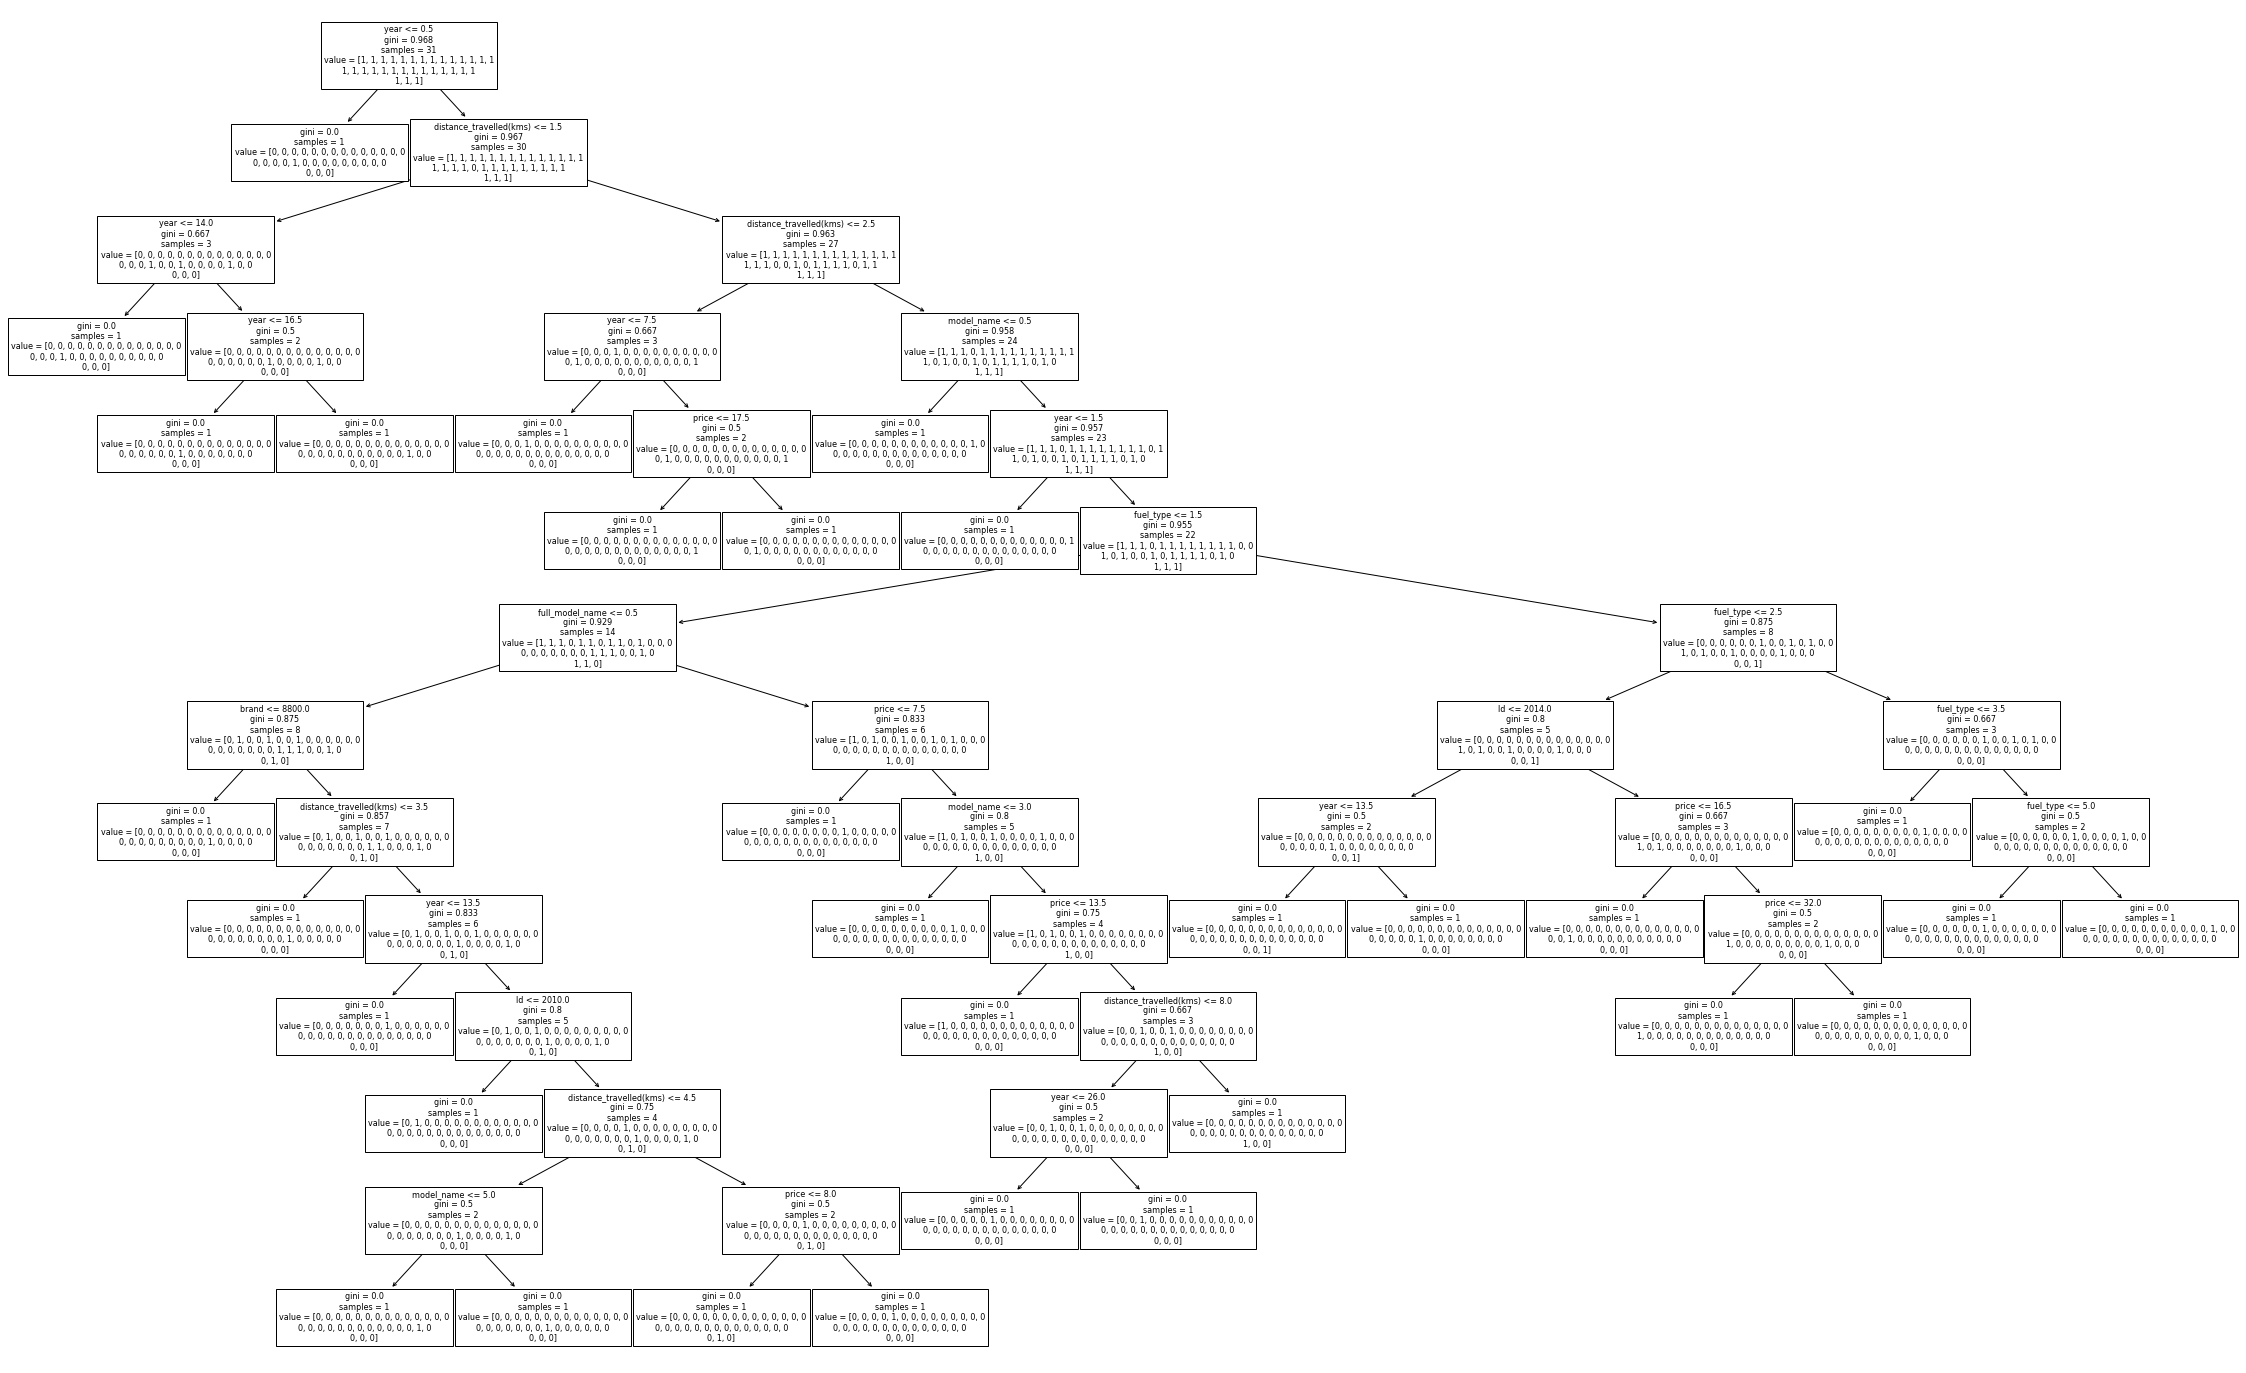

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,25))
plot_tree(dec_tree,feature_names = dt_df.columns)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ['gini','entropy'],
         'max_depth':[2,3,4,5],
         'min_samples_leaf':[1,2,3]}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(estimator=tree1,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10,
                       verbose=1)

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=0, n_estimators=100,
                                criterion = 'gini',max_depth=4,
                                max_features='sqrt')
print(random_forest.fit(X, Y))
predicted_outcome = random_forest.predict(X)

print("\nAccuracy Score for RandomForestClassifier:")
metrics.accuracy_score(predicted_outcome, Y)

RandomForestClassifier(max_depth=4, max_features='sqrt', random_state=0)

Accuracy Score for RandomForestClassifier:


1.0

### SVM

In [ ]:
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [ ]:
svm_df = usedcars_data.copy()
svm_df.drop(['Id','full_model_name','model_name'],axis=1,inplace=True)
labelencoder = LabelEncoder()

svm_df["fuel_type"] = labelencoder.fit_transform(svm_df["fuel_type"])
svm_df["city"] = labelencoder.fit_transform(svm_df["city"])
svm_df["brand"] = labelencoder.fit_transform(svm_df["brand"])


In [ ]:
svm_df.head()

,year,brand,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,count
23,2016,26,675000.0,58000.0,0,4,27,5.0,6
0,2016,7,425000.0,9680.0,1,4,7,5.0,4
455,2020,12,1850000.0,5800.0,1,2,20,1.0,3
9,2015,20,510000.0,48286.0,1,4,32,6.0,3
63,2016,18,1275000.0,72000.0,0,4,24,5.0,2


In [ ]:
Y = svm_df["price"]
X = svm_df.drop(["price"], axis=1)



train_x, test_x, train_y, test_y = train_test_split(
    X, Y, test_size=0.30, random_state=10)

In [ ]:
model_svm = svm.LinearSVC()
model_svm.fit(train_x, train_y)

print("\nAccuracy Score for LinearSVC:")

predicted_outcome = model_svm.predict(X)
metrics.accuracy_score(predicted_outcome, Y)


Accuracy Score for LinearSVC:


0.06451612903225806

### KMean

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
km_df = pd.read_csv("cars.csv", index_col="Id")

km_df.drop(['full_model_name','model_name'],axis=1,inplace=True)
labelencoder = LabelEncoder()

km_df["fuel_type"] = labelencoder.fit_transform(km_df["fuel_type"])
km_df["city"] = labelencoder.fit_transform(km_df["city"])
km_df["brand"] = labelencoder.fit_transform(km_df["brand"])



kmeans = KMeans(n_clusters=4)

kmeans.fit(km_df)

print("Cluster's Center\n")
print(kmeans.cluster_centers_)

Cluster's Center

[[2.01486356e+03 1.55324459e+01 7.01355657e+05 5.66223136e+04
  2.14642263e+00 5.70632280e+00 1.71830283e+01 6.13643927e+00]
 [2.01749673e+03 1.27189542e+01 5.06398693e+06 3.75032549e+04
  1.44444444e+00 4.73856209e+00 1.08627451e+01 3.50326797e+00]
 [2.01658333e+03 1.25000000e+01 1.24250000e+07 2.35092500e+04
  2.00000000e+00 5.75000000e+00 1.57500000e+01 4.41666667e+00]
 [2.01622067e+03 1.27262570e+01 2.26724860e+06 5.25366257e+04
  1.36033520e+00 5.28212291e+00 1.29357542e+01 4.77932961e+00]]


In [ ]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Count of each cluster")
print(dict_data)

Count of each cluster
{0: 1202, 1: 153, 2: 12, 3: 358}


Inertia

467953683940253.1
Data with clusters

      year  brand      price  distance_travelled(kms)  fuel_type  city  \
Id                                                                       
0     2016      7   425000.0                   9680.0          3     9   
1     2012     23   325000.0                 119120.0          1     9   
2     2017     28  2650000.0                  64593.0          1    14   
3     2017     21  4195000.0                  25000.0          1     9   
4     2012      8   475000.0                  23800.0          1     9   
...    ...    ...        ...                      ...        ...   ...   
1720  2015      8   290000.0                  38000.0          3    13   
1721  2011      2  7500000.0                  36000.0          3    13   
1722  2008     19   185000.0                 142522.0          1    13   
1723  1990     18   325000.0                  18581.0          1    13   
1724  2017      8  1395000.0                  31028.0          1 

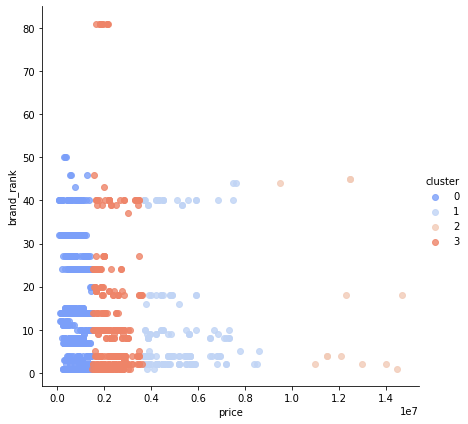

In [ ]:
km_df["cluster"] = kmeans.labels_
sns.lmplot('price', 'brand_rank', data=km_df,
           hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)


print("Inertia\n")
print(kmeans.inertia_)


# Print the data
print("Data with clusters\n")
print(km_df)
